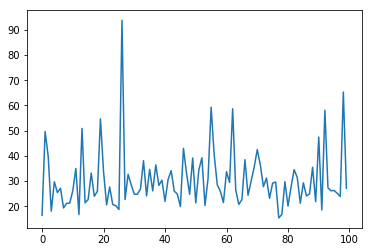

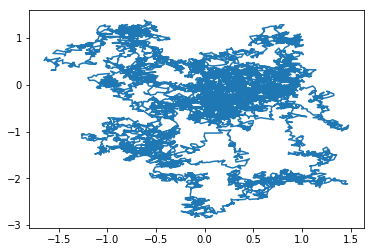

tensor([[0.4047],
        [0.5180],
        [0.2528],
        [0.2099],
        [0.3812]], grad_fn=<CopySlices>)
tensor([[0.6731],
        [0.4079],
        [0.8931],
        [0.3953],
        [0.6162]], grad_fn=<CopySlices>)
tensor([[0.2616],
        [0.5824],
        [0.6013],
        [0.7569],
        [0.6940]], grad_fn=<CopySlices>)
tensor([[0.4635],
        [0.5593],
        [0.2147],
        [0.4890],
        [0.3143]], grad_fn=<CopySlices>)
tensor([[0.1027],
        [0.3351],
        [0.6624],
        [0.3650],
        [0.2905]], grad_fn=<CopySlices>)
tensor([[0.3239],
        [0.1417],
        [0.5694],
        [0.5382],
        [0.7147]], grad_fn=<CopySlices>)
tensor([[0.3161],
        [0.9230],
        [0.3729],
        [0.3034],
        [0.2603]], grad_fn=<CopySlices>)
tensor([[1.1082],
        [0.8789],
        [1.5373],
        [0.2941],
        [0.5188]], grad_fn=<CopySlices>)


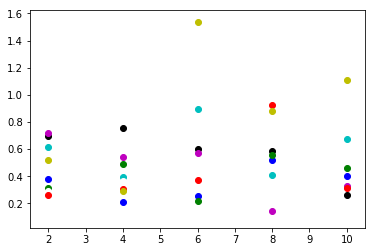

In [3]:
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

torch.manual_seed(42)
p = torch.tensor([10,8,6,4,2],dtype=torch.float)
p1=torch.diag(p)
n=5
tao=100
dt = 1e-3
T=int(10/dt)
B=10
w=torch.randn(n,n, device='cpu', requires_grad=True,dtype=torch.float)
w1=torch.diag(w)
w_rec=torch.diag(w1)
w1_rec = w-w_rec
lr = 1e-1
n_epochs = 100
optimizer = optim.SGD([w], lr=lr)
V=torch.zeros(T,n)
ep=np.arange(n_epochs)
Loss=torch.zeros(n_epochs,)
for epoch in range(n_epochs):
    z=torch.randn(1,n)
    Z=torch.zeros(T,n)
    for t in range(T):
        N=torch.randn(1,n)
        z_dot=(-z+(z@w1_rec)/math.sqrt(n))
        z = z + z_dot*dt+N*math.sqrt(dt)
        Z[t] = z
    

    loss = ((Z@p1)**2).mean()
    
    loss.backward()       
    optimizer.step()
    optimizer.zero_grad()
    Loss[epoch]=loss
 
plt.plot(ep,Loss.detach().numpy())
plt.show()


plt.plot(Z[:,0].detach().numpy(), Z[:,1].detach().numpy())
plt.show()  



color=['b','c','k','g','w','m','r','y']
for a in range(8):
    z=torch.randn(1,n)
    Z=torch.zeros(int(T/2),n)
    for t in range(T):
        N=torch.randn(1,n)
        z_dot=(-z+(z@w1_rec)/math.sqrt(n))
        z = z + z_dot*dt+N*math.sqrt(dt)
        q= int(t-T/2)
        Z[q] = z
  
    V=torch.zeros(n,1)

    for i in range(n):
        V[i]=torch.var(Z[:,i])
    print (V)
    
    plt.scatter(p,V.detach().numpy(),color=color[a])
    


                
plt.show()  



    
    
#plt.plot(p,V.detach().numpy(), 'r--', p, V2.detach().numpy(), 'bs', p, V.detach().numpy(), 'g^')
#plt.show()






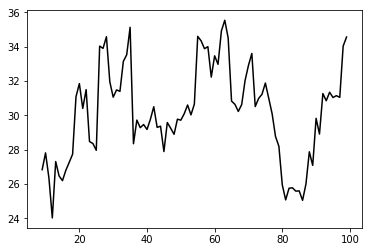

In [6]:
import pandas as pd

df=pd.DataFrame(Loss.detach().numpy())
rolling_mean = df.rolling(window=10).mean()
plt.plot(ep, rolling_mean, label='Learning Curve', color='k')
